<a href="https://colab.research.google.com/github/muttaqienaab/Analisis-Data-E-Commerce/blob/main/Trendwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import **Libary** **teks tebal**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joykimaiyo18/linkedin-data-jobs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/linkedin-data-jobs-dataset


import dataset

In [21]:
df = pd.read_csv('/kaggle/input/linkedin-data-jobs-dataset/clean_jobs.csv')
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [22]:
df.tail()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
322,691,Data Engineer- Python Pyspark,Virtusa,"Chennai, Tamil Nadu, India",https://in.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-10,NaN,NaN,Senior Data Engineer\n\nPosition Summary\n\nTh...
323,692,Data Engineer with Pyspark,Cognizant,"Bangalore Urban, Karnataka, India",https://in.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-13,NaN,NaN,Job Title:- Data Engineer with Pyspark\n\nLoca...
324,693,Data Engineer,Mercedes-Benz Malaysia,"Puchong, Selangor, Malaysia",https://my.linkedin.com/jobs/view/data-enginee...,LinkedIn,2025-04-16,NaN,NaN,"About Us\n\n\n\n\nAt Mercedes-Benz, we don’t j..."
325,740,Data Engineer I,IntePros,"Seattle, WA",https://www.linkedin.com/jobs/view/data-engine...,LinkedIn,2025-04-15,NaN,NaN,Data Engineer I – Infrastructure & Automation ...
326,741,Data Engineer,Snap Inc.,"Bellevue, WA",https://www.linkedin.com/jobs/view/data-engine...,LinkedIn,2025-04-16,NaN,NaN,Snap Inc is a technology company. We believe t...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [24]:
df.describe()

,id,work_type,employment_type
count,327.000000,0.0,0.0
mean,382.605505,NaN,NaN
std,224.546087,NaN,NaN
min,1.000000,NaN,NaN
25%,132.500000,NaN,NaN
50%,425.000000,NaN,NaN
75%,599.500000,NaN,NaN
max,741.000000,NaN,NaN


In [25]:
df.isnull()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
322,False,False,False,False,False,False,False,True,True,False
323,False,False,False,False,False,False,False,True,True,False
324,False,False,False,False,False,False,False,True,True,False
325,False,False,False,False,False,False,False,True,True,False


In [26]:
df.isnull() .sum()

,0
id,0
title,0
company,0
location,0
link,0
source,0
date_posted,0
work_type,327
employment_type,327
description,0


In [27]:
df.duplicated() .sum()

np.int64(0)

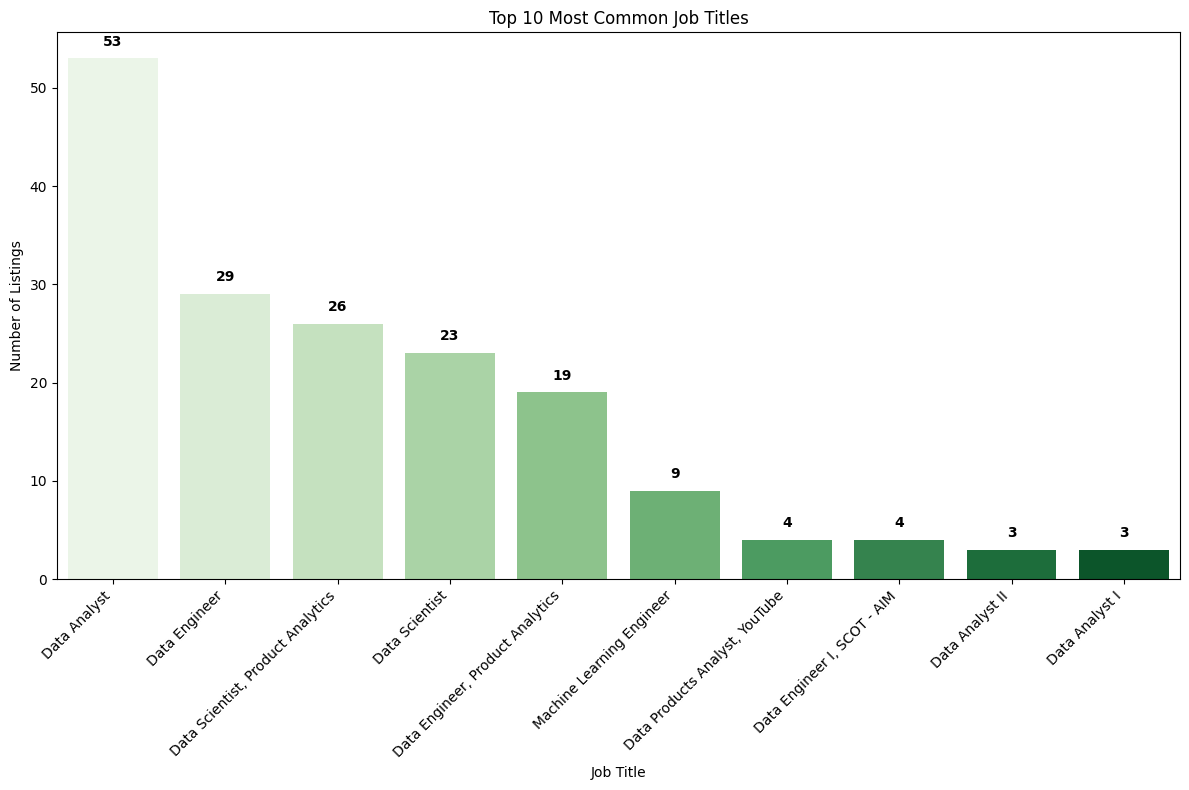

In [34]:
# Ambil 10 job title teratas
top_titles = df['title'].value_counts().head(10)

# Buat gradasi warna hijau
colors = sns.color_palette("Greens", n_colors=10)  # 10 warna gradasi hijau

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_titles.index, y=top_titles.values, palette=colors)

# Tambahkan angka di atas batang
for i, value in enumerate(top_titles.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', color='black', fontweight='bold')

# Set judul dan label
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')

# Rotasi label x-axis biar lebih rapi
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<Axes: xlabel='company'>

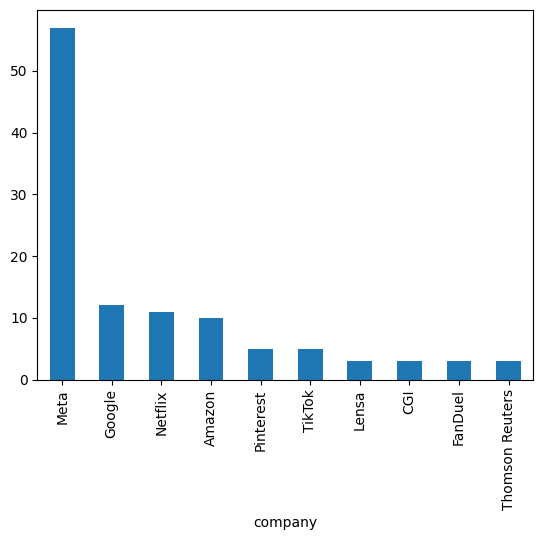

In [38]:
df["company"].value_counts()[:10] .plot(kind ="bar")

In [39]:
df.isnull() .sum()

,0
id,0
title,0
company,0
location,0
link,0
source,0
date_posted,0
work_type,327
employment_type,327
description,0


In [40]:
df.location.unique()

array(['New York, NY', 'San Francisco, CA', 'Los Angeles, CA',
       'Washington, DC', 'Chicago, IL', 'Atlanta, GA', 'United States',
       'New York City Metropolitan Area', 'Yakima, WA', 'Brooklyn, NY',
       'Plano, TX', 'Mountain View, CA', 'San Bruno, CA',
       'Culver City, CA', 'Washington DC-Baltimore Area',
       'Plantation, FL', 'Jersey City, NJ', 'Arlington, VA',
       'California, United States', 'Jacksonville, FL', 'Lexington, MA',
       'Frisco, TX', 'Stamford, CT', 'Palo Alto, CA', 'San Diego, CA',
       'Houston, TX', 'Irvine, CA', 'São Paulo, São Paulo, Brazil',
       'Bangalore Rural, Karnataka, India', 'Bengaluru, Karnataka, India',
       'London, England, United Kingdom',
       'Silverstone, England, United Kingdom',
       'Bengaluru East, Karnataka, India', 'Sofia, Sofia City, Bulgaria',
       'Jakarta, Jakarta, Indonesia', 'London Area, United Kingdom',
       'Greater London, England, United Kingdom', 'Riyadh, Saudi Arabia',
       'Greater Bengalu

In [41]:
# First, remove leading/trailing spaces and split
df[['City', 'Country']] = df['location'].apply(lambda x: [i.strip() for i in x.split(',')][::2]).apply(pd.Series)

<Axes: xlabel='City'>

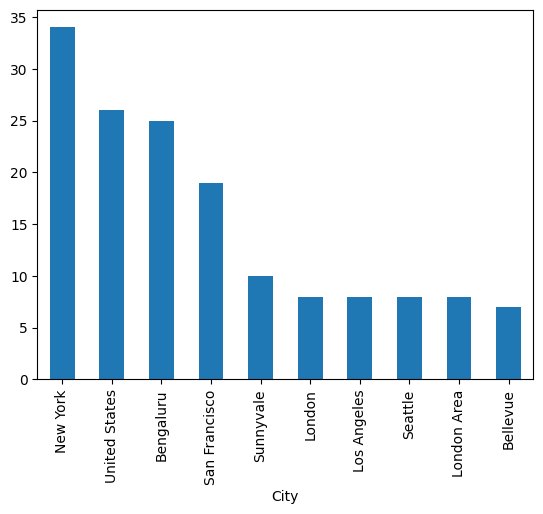

In [42]:
df["City"].value_counts()[:10].plot(kind = "bar")

In [43]:
df_indonesia_jobs = df[df['Country'] == 'Indonesia']

<Axes: xlabel='City'>

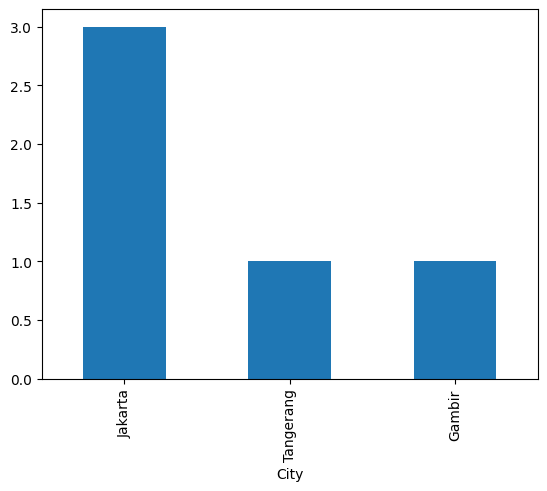

In [44]:
df_indonesia_jobs["City"].value_counts().plot(kind = "bar")

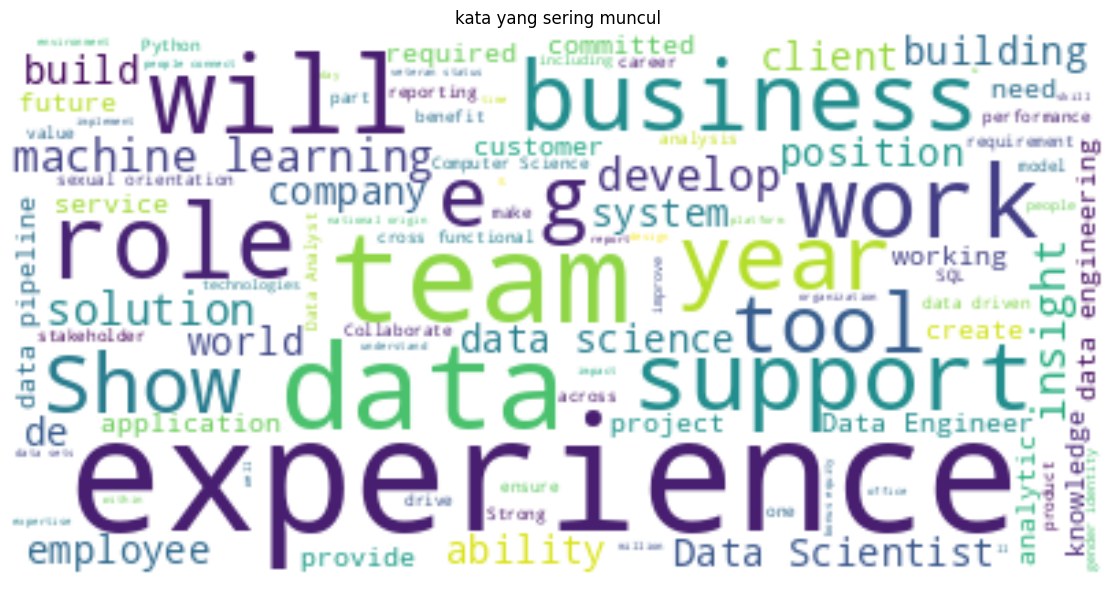

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join(df['description'].dropna().tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('kata yang sering muncul')
plt.tight_layout()
plt.show()